In [1]:
import numpy as np
import pandas as pd

import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix

import seaborn as sns

In [3]:
DATA_PATH = "/Users/sreeharshaankem/MachineLearning/analytics_vidya/loan_prediction/data/"
os.listdir(DATA_PATH)

In [5]:
df_train = pd.read_csv(DATA_PATH+"train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv(DATA_PATH+"test_Y3wMUE5_7gLdaTN.csv")

In [6]:
def get_dataframe_info(df):
    print("Shape:\n {}\n".format(df.shape))
    print("Info:\n {}".format(df.info()))
    

In [9]:
def cast_dataframe_columns(df):
    for idx, col in enumerate(df.columns):
        unique_values = df[col].unique()
        unique_count = df[col].nunique()
        print("Column name : {}, {} of {} column s \n".format(col, idx, df.shape[1]))
        print("Unique values : {}\n".format(unique_values))
        print("Count of values : {}\n".format(unique_count))
        
        print("Enter a datatype for the column:\n")
        print("Valid choices : [int, float, O]")
        datatype = input()
        df[col] = df[col].astype(datatype)
        print("++++++++++++++++++++++++++++++++++++++++++++")
        
    print("Casted columns...{}".format(df.info()))
    return df

In [21]:
def merge_low_frequency_levels(df, mode = "percentile"):
    
    df1 = df.copy()
    
    for col in CATEGORICAL:


        print("Merging Levels for field :{}".format(col))
        print("No. of Levels Before :{}".format(df1[col].nunique()))
        
        #Frequency of each level
        df1_level_freq = df1.groupby(col).agg({ID:"nunique"})
        df1_level_freq.reset_index(inplace = True)
        df1_level_freq = df1_level_freq.rename(columns = {ID:"FREQUENCY"})
        
        #Sort in descending order of frequency
        df1_level_freq = df1_level_freq.sort_values(by = "FREQUENCY", ascending = False)
        df1_level_freq["CUM_FREQUENCY"] = df1_level_freq["FREQUENCY"].cumsum()
        df1_level_freq["CUM_PERCENT"] = df1_level_freq["CUM_FREQUENCY"]/df1_level_freq["FREQUENCY"].sum()


        percentile_threshold = 0.9
        percentage_threshold = df1.shape[0]//10


        #Select mode based on frequency
        print(df1_level_freq)
        print("Percentage threshold : {}".format(percentage_threshold))
        print("Percentile threshold : {}".format(percentile_threshold))
        
        mode = input("Select Mode: \n Valid Choices: [percentile, percentage]")
        if mode == "percentile":
            frequency_threshold = percentile_threshold
            frequent_levels = df1_level_freq.loc[df1_level_freq["CUM_PERCENT"]<=frequency_threshold, col].unique()


        elif mode == "percentage":
            frequency_threshold = percentage_threshold
            frequent_levels = df1_level_freq.loc[df1_level_freq["FREQUENCY"]>=frequency_threshold, col].unique()


        
        print(frequent_levels)
        
        #Replacing less frequent levels with "Others"
        df1.loc[~df1[col].isin(frequent_levels), col] = "OTHERS"
        print("No. of Levels After :{}".format(df1[col].nunique()))
        
        print("++++++++++++++++++++++++++++++++++++++++++++++++++\n")
    return df1

In [7]:
get_dataframe_info(df_train)

Shape:
 (614, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
Info:
 None


In [10]:
df_train = cast_dataframe_columns(df_train)

Column name : Loan_ID, 0 of 13 column s 

Unique values : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP

float
++++++++++++++++++++++++++++++++++++++++++++
Column name : CoapplicantIncome, 7 of 13 column s 

Unique values : [0.00000000e+00 1.50800000e+03 2.35800000e+03 4.19600000e+03
 1.51600000e+03 2.50400000e+03 1.52600000e+03 1.09680000e+04
 7.00000000e+02 1.84000000e+03 8.10600000e+03 2.84000000e+03
 1.08600000e+03 3.50000000e+03 5.62500000e+03 1.91100000e+03
 1.91700000e+03 2.92500000e+03 2.25300000e+03 1.04000000e+03
 2.08300000e+03 3.36900000e+03 1.66700000e+03 3.00000000e+03
 2.06700000e+03 1.33000000e+03 1.45900000e+03 7.21000000e+03
 1.66800000e+03 1.21300000e+03 2.33600000e+03 3.44000000e+03
 2.27500000e+03 1.64400000e+03 1.16700000e+03 1.59100000e+03
 2.20000000e+03 2.25000000e+03 2.85900000e+03 3.79600000e+03
 3.44900000e+03 4.59500000e+03 2.25400000e+03 3.06600000e+03
 1.87500000e+03 1.77400000e+03 4.75000000e+03 3.02200000e+03
 4.00000000e+03 2.16600000e+03 1.88100000e+03 2.53100000e+03
 2.00000000e+03 2.11800000e+03 4.16700000e+03 2.90000000e+03
 5.65400000e+03 1.82000000e

In [11]:
def get_summary_stats(df):
    df_datatypes = df_train.dtypes.to_frame(name = "Datatype")
    df_na_count = df.isnull().sum().to_frame(name = "NA_count")
    df_numeric_stats = df.describe().T
    df_unique_count = df.nunique().to_frame(name="unique_count")
    
    df_summary_stats = pd.concat([df_datatypes, df_na_count, df_numeric_stats, df_unique_count], axis =1)
    df_summary_stats.reset_index(inplace = True)
    df_summary_stats = df_summary_stats.rename(columns = {"index":"Field"})
    

    return df_summary_stats

In [23]:
def mean_incidence_rate_per_level(df):
    records_threshold = df.shape[0]//10
    for col in CATEGORICAL:
        print("For Column : {}".format(col))
        df_prob_per_level = df.groupby(col).agg({TARGET:"mean", ID:"nunique"})
        df_prob_per_level = df_prob_per_level.rename(columns = \
                                                     {TARGET:"LABEL_RATE", 
                                                      ID    : "COUNT"})
        df_prob_per_level = df_prob_per_level.sort_values(by = "LABEL_RATE",\
                                                          ascending = False).iloc[0:25]
        print(df_prob_per_level)
        
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

In [12]:
df_train_stats = get_summary_stats(df_train)
df_train_stats

,Field,Datatype,NA_count,count,mean,std,min,25%,50%,75%,max,unique_count
0,ApplicantIncome,float64,0,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0,505
1,CoapplicantIncome,float64,0,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0,287
2,Credit_History,object,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,Dependents,object,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Education,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,Gender,object,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,LoanAmount,float64,22,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0,203
7,Loan_Amount_Term,float64,14,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0,10
8,Loan_ID,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614
9,Loan_Status,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


# EDA

In [14]:
df_train_stats.loc[df_train_stats["Datatype"] == "float64", "Field"].unique().tolist()

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [15]:
ID = "Loan_ID"
TARGET = "Loan_Status"
NUMERIC = df_train_stats.loc[df_train_stats["Datatype"] == "float64", "Field"].unique().tolist()
CATEGORICAL = [col for col in df_train_stats.loc[df_train_stats["Datatype"]=="object","Field"].unique().tolist() \
                      if col not in [ID, TARGET]]

In [16]:
df_train.loc[:, CATEGORICAL] = df_train.loc[:, CATEGORICAL].fillna("MISSING")

df_train[TARGET] = df_train[TARGET].apply(lambda x: 1 if x=="Y" else 0)

# 1.Merging low frequency levels

In [22]:
df_train_levels_merged = merge_low_frequency_levels(df_train)

Merging Levels for field :Credit_History
No. of Levels Before :3
  Credit_History  FREQUENCY  CUM_FREQUENCY  CUM_PERCENT
1              1        475            475     0.773616
0              0         89            564     0.918567
2        MISSING         50            614     1.000000
Percentage threshold : 61
Percentile threshold : 0.9
Select Mode: 
 Valid Choices: [percentile, percentage]percentage
[1.0 0.0]
No. of Levels After :3
++++++++++++++++++++++++++++++++++++++++++++++++++

Merging Levels for field :Dependents
No. of Levels Before :5
  Dependents  FREQUENCY  CUM_FREQUENCY  CUM_PERCENT
0          0        345            345     0.561889
1          1        102            447     0.728013
2          2        101            548     0.892508
3         3+         51            599     0.975570
4    MISSING         15            614     1.000000
Percentage threshold : 61
Percentile threshold : 0.9
Select Mode: 
 Valid Choices: [percentile, percentage]percentage
['0' '1' '2']
No.

# Mean Label Incidence Rate per Level

1. __Credit_History__: Availability of Credit History is a good Indicator
2. __Dependents__: Borrower with 2 dependents is more likely to a get the loan
3. __Education__: Non-Graduates are less likely to get a loan
4. __Gender__: Not very useful
5. __Married__: If not married less likely to get a loan
6. __Property_Area__: High and low for Semiurban and Rural resp. 
7. __Self_Employed__: Not very useful

In [24]:
mean_incidence_rate_per_level(df_train_levels_merged)

For Column : Credit_History
                LABEL_RATE  COUNT
Credit_History                   
1.0               0.795789    475
OTHERS            0.740000     50
0.0               0.078652     89
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

For Column : Dependents
            LABEL_RATE  COUNT
Dependents                   
2             0.752475    101
0             0.689855    345
1             0.647059    102
OTHERS        0.636364     66
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

For Column : Education
              LABEL_RATE  COUNT
Education                      
Graduate        0.708333    480
Not Graduate    0.611940    134
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

For Column : Gender
        LABEL_RATE  COUNT
Gender                   
Male      0.693252    489
Female    0.669643    112
OTHERS    0.615385     13
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

For Column : Married
         LAB

# Numeric Pairplot

In [28]:
df_train_levels_merged.loc[:, NUMERIC] = df_train_levels_merged.loc[:, NUMERIC].fillna(df_train_levels_merged.loc[:, NUMERIC].median())

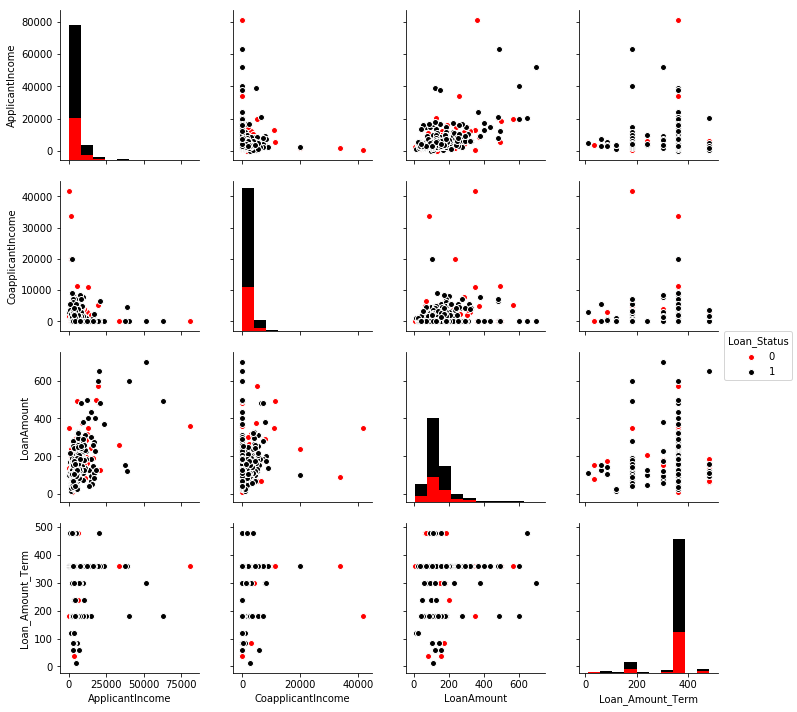

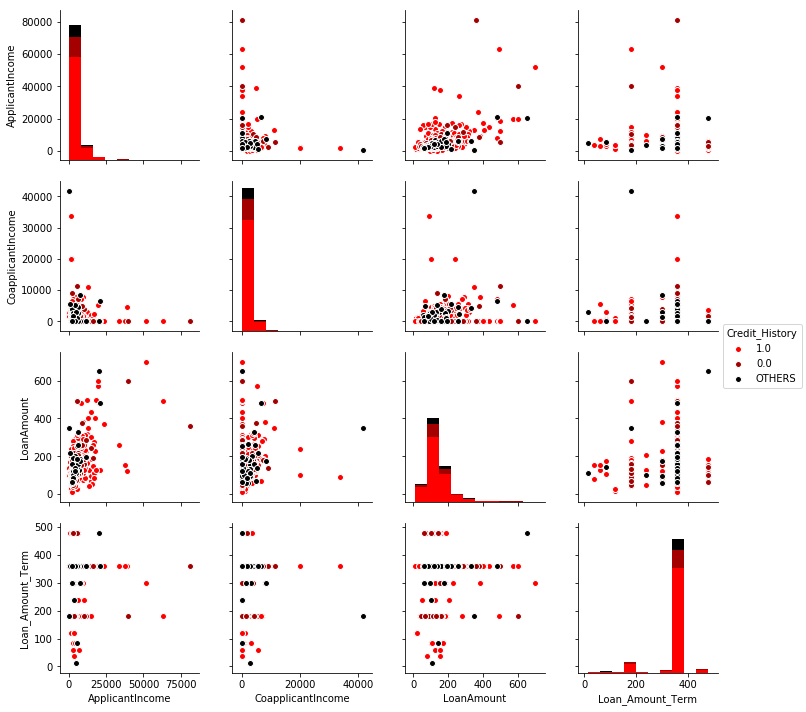

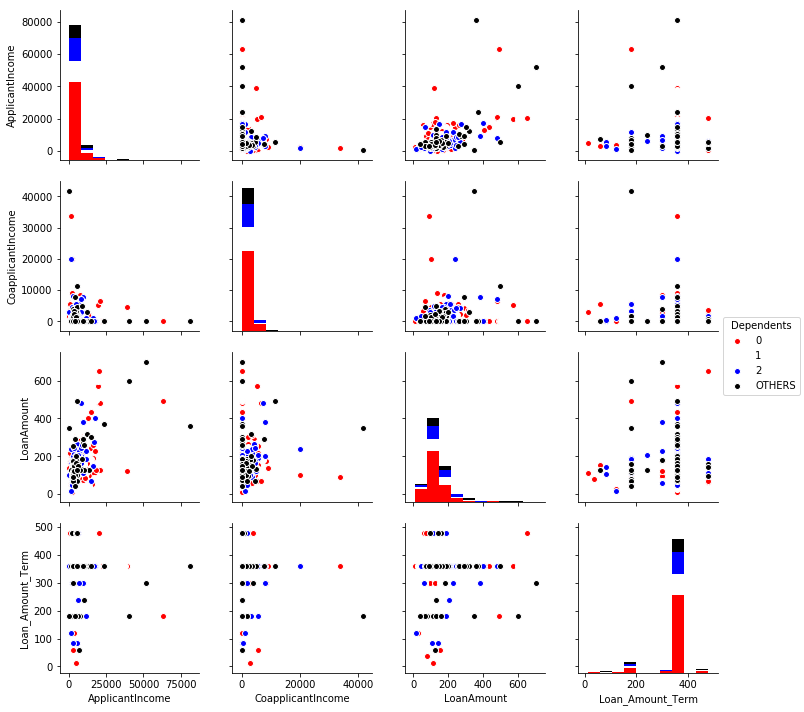

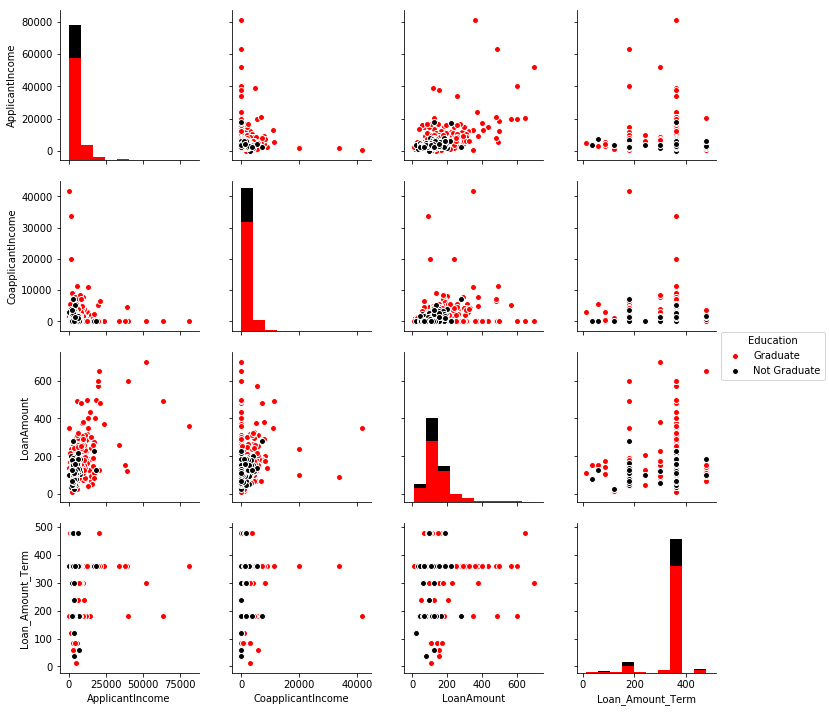

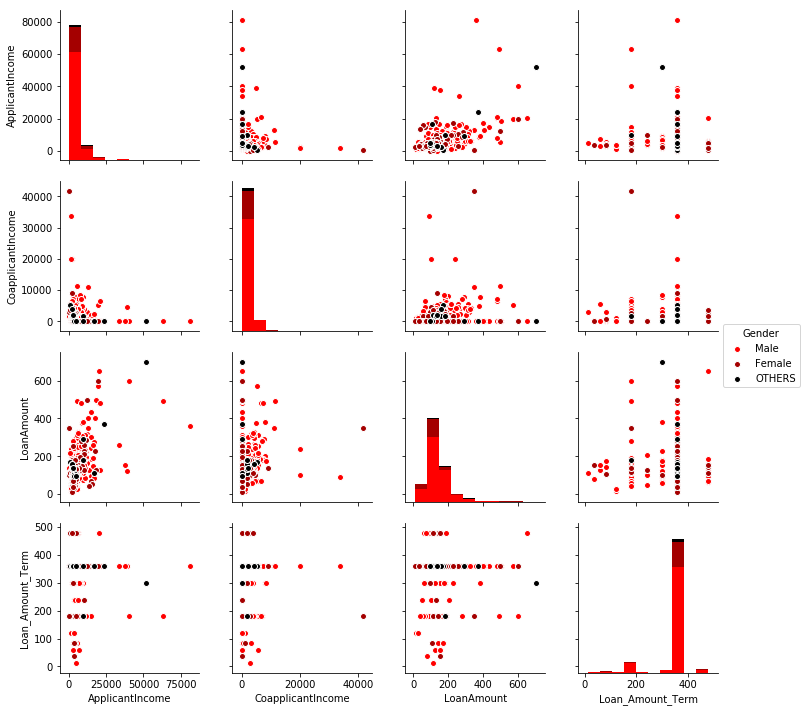

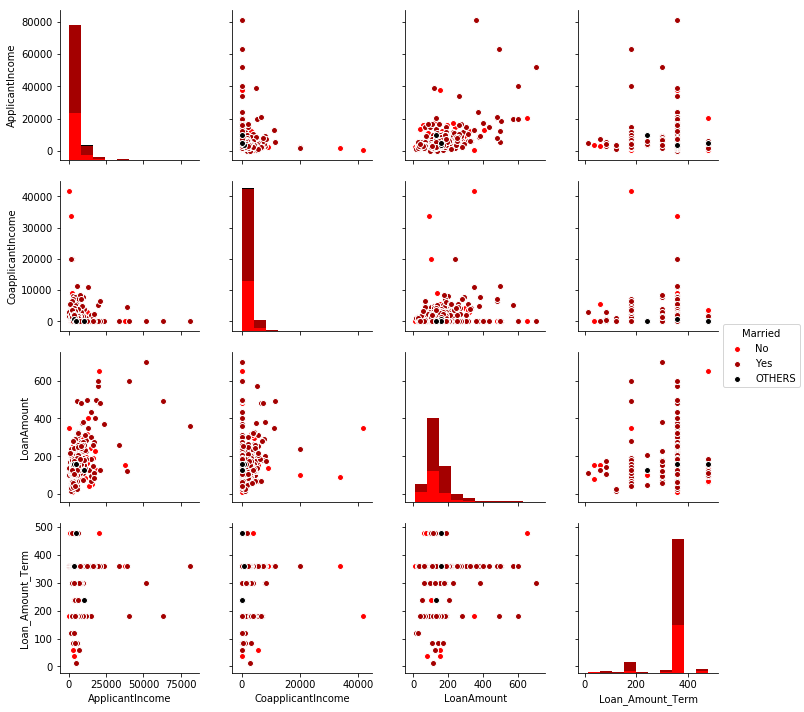

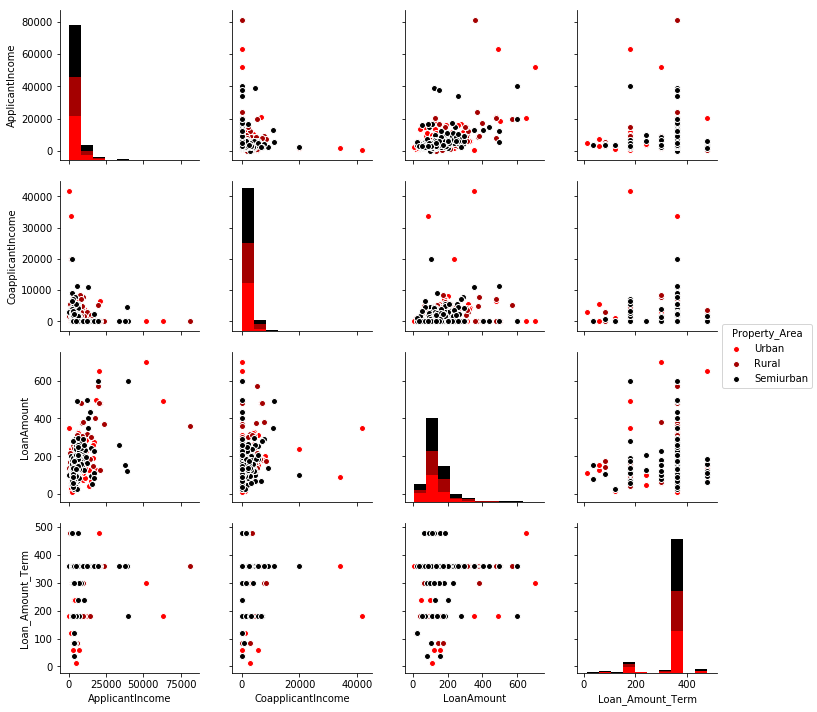

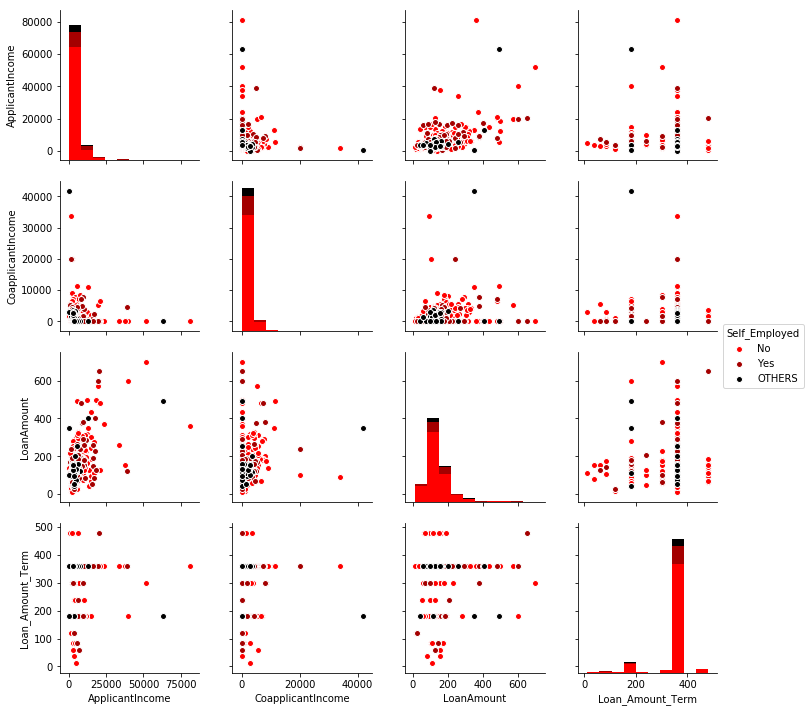

In [29]:
for col in [TARGET]+CATEGORICAL:
    fig = plt.figure()
    class_count = df_train_levels_merged[col].nunique()
    cm_class_numbers = np.linspace(0, 1, class_count)
    colors = [cm.flag(label) for label in cm_class_numbers]
    sns.pairplot(data = df_train_levels_merged, vars = NUMERIC, hue = col, palette=sns.color_palette(colors));

# Feature Engineering

In [30]:
def feature_engineering(df):
    df["Income"] = df["ApplicantIncome"]+df["CoapplicantIncome"]
    df["Emi"] = df["LoanAmount"]/df["Loan_Amount_Term"]
    df["Ratio_LoanAmount_Income"] = df["Income"]/df["LoanAmount"]
    df["Ratio_LoanAmount_ApplicantIncome"] = df["ApplicantIncome"]/df["LoanAmount"]
    df["Ratio_LoanAmount_CoapplicantIncome"] = df["CoapplicantIncome"]/df["LoanAmount"]
    df["Income_Term"] = df["Income"]*df["Loan_Amount_Term"]
    df["Ratio_Income_Term_LoanAmount"] = df["Income_Term"]/df["LoanAmount"]
    
    NUMERIC.extend(["Income", "Emi", "Ratio_LoanAmount_Income",\
                     "Ratio_LoanAmount_ApplicantIncome", "Ratio_LoanAmount_CoapplicantIncome", \
                     "Income_Term", "Ratio_Income_Term_LoanAmount"])
    
    df["CoapplicantIncomeFlag"] = df["CoapplicantIncome"].apply(lambda x: 1 if x>0 else 0)
    CATEGORICAL.extend(["CoapplicantIncomeFlag"])
    return df

In [31]:
df_eng = feature_engineering(df_train_levels_merged)

# Outlier Treatment

In [32]:
def interquartile_range(df):
    for col in NUMERIC:
        print("Column : {}".format(col))
        q25 = df[col].quantile(q = 0.25)
        q75 = df[col].quantile(q = 0.75)
        df.loc[df[col]<q25,col] = q25
        df.loc[df[col]>q75, col] = q75
    return df

In [33]:
df_out = interquartile_range(df_eng)

Column : ApplicantIncome
Column : CoapplicantIncome
Column : LoanAmount
Column : Loan_Amount_Term
Column : Income
Column : Emi
Column : Ratio_LoanAmount_Income
Column : Ratio_LoanAmount_ApplicantIncome
Column : Ratio_LoanAmount_CoapplicantIncome
Column : Income_Term
Column : Ratio_Income_Term_LoanAmount


# Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_out.loc[:, NUMERIC] = ss.fit_transform(df_out.loc[:, NUMERIC])

# Dummies

In [41]:
df_model = pd.concat([df_out.loc[:, [ID]+NUMERIC], 
                      pd.get_dummies(df_out.loc[:, CATEGORICAL], drop_first=True), 
                      df_out.loc[:, [TARGET]]], axis = 1)

In [42]:
X = df_model.loc[:, [ID]+NUMERIC+CATEGORICAL]
Y = df_model.loc[:, [ID, TARGET]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
